## Data cleaning and preprocessing

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from string import punctuation
import nltk
nltk.download("stopwords")
#--------#
import re
from nltk.corpus import stopwords
from pymystem3 import Mystem
import matplotlib.pyplot as plt

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\slava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
print('Hello')

Hello


## Text preprocessing

In [142]:
df = pd.read_csv('CB_releases_nlp.csv')
df

,Date,Link,Rate,Diff
0,27/10/23,https://www.cbr.ru/press/pr/?file=27102023_133...,13.0,1.0
1,15/09/23,https://www.cbr.ru/press/pr/?file=15092023_133...,12.0,0.0
2,15/08/23,https://www.cbr.ru/press/pr/?file=15082023_103...,12.0,1.0
3,14/08/23,https://www.cbr.ru/press/pr/?file=638276292028...,8.5,1.0
4,21/07/23,https://www.cbr.ru/press/pr/?file=21072023_133...,7.5,0.0
...,...,...,...,...
75,11/09/15,https://www.cbr.ru/press/pr/?file=11092015_133...,11.0,-1.0
76,31/07/15,https://www.cbr.ru/press/pr/?file=31072015_133...,11.5,-1.0
77,15/06/15,https://www.cbr.ru/press/pr/?file=15062015_133...,12.5,0.0
78,06/05/15,https://www.cbr.ru/press/pr/?file=06052015_163...,12.5,-1.0


In [4]:
url = df['Link'][70]


def text_cleaning_from_url(url):
    r = requests.get(url)
    html_doc = r.text
    soup = BeautifulSoup(html_doc, 'html.parser')
    text = soup.get_text()
    text.replace('\n','').replace('\t','').replace('\xa0',' ').replace('\r',' ').replace('  ','')
    str1 = soup.find_all('div', attrs={'class': 'landing-text'})[0].get_text(separator=' ').replace('\n','').replace('\t','').replace('\xa0',' ').replace('\r',' ').strip()
    str1 = ''.join([i for i in str1 if not i.isdigit()])
    str1 = re.sub(r'[^\w\s]','',str1)
    mystem = Mystem()
    russian_stopwords = stopwords.words("russian")

    tokens = mystem.lemmatize(str1.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
                  and token != " " \
                  and token.strip() not in punctuation]

    str1 = " ".join(tokens)

    return str1


In [143]:
text_preprocessed = []

for i in df['Link']:
  text_preprocessed.append(text_cleaning_from_url(i))

df['text'] = text_preprocessed

In [6]:
df = df.dropna()
text_len=[]
for i in range(0,len(df)):
  text_len.append(len(df.text[i]))

df_len = pd.DataFrame(text_len, columns=['len'])
df_len.columns

Index(['len'], dtype='object')

In [7]:
df_len_short = df_len.sort_values(by=['len']).head(11)
df_len_short.reset_index()['index'][0]

15

In [8]:

# for i in df_len_short.reset_index()['index']:
#   print(i)
#   print(df.iloc[i].Link)
#   print(df.iloc[i].text)
#   print('\n')


print(list(df_len_short.reset_index()['index']))
idx_to_delete = [15, 3, 74, 78, 71, 32, 43]
df

[15, 3, 74, 78, 71, 32, 19, 43, 14, 17, 2]


,Date,Link,Rate,Diff,text
0,27/10/23,https://www.cbr.ru/press/pr/?file=27102023_133...,13.0,1.0,совет директор банк россия октябрь год принима...
1,15/09/23,https://www.cbr.ru/press/pr/?file=15092023_133...,12.0,0.0,совет директор банк россия сентябрь год приним...
2,15/08/23,https://www.cbr.ru/press/pr/?file=15082023_103...,12.0,1.0,совет директор банк россия принимать решение п...
3,14/08/23,https://www.cbr.ru/press/pr/?file=638276292028...,8.5,1.0,вторник август год состояться заседание совет ...
4,21/07/23,https://www.cbr.ru/press/pr/?file=21072023_133...,7.5,0.0,совет директор банк россия июль год принимать ...
...,...,...,...,...,...
74,11/09/15,https://www.cbr.ru/press/pr/?file=11092015_160...,11.0,0.0,цель оперативный информирование пользователь м...
75,11/09/15,https://www.cbr.ru/press/pr/?file=11092015_133...,11.0,-1.0,совет директор банк россия сентябрь год приним...
76,31/07/15,https://www.cbr.ru/press/pr/?file=31072015_133...,11.5,-1.0,совет директор банк россия июль год принимать ...
77,15/06/15,https://www.cbr.ru/press/pr/?file=15062015_133...,12.5,0.0,совет директор банк россия июнь год принимать ...


In [9]:
df = df.drop(idx_to_delete).reset_index(drop=True)
df['text_len'] = len(df['text'])
df

,Date,Link,Rate,Diff,text,text_len
0,27/10/23,https://www.cbr.ru/press/pr/?file=27102023_133...,13.0,1.0,совет директор банк россия октябрь год принима...,72
1,15/09/23,https://www.cbr.ru/press/pr/?file=15092023_133...,12.0,0.0,совет директор банк россия сентябрь год приним...,72
2,15/08/23,https://www.cbr.ru/press/pr/?file=15082023_103...,12.0,1.0,совет директор банк россия принимать решение п...,72
3,21/07/23,https://www.cbr.ru/press/pr/?file=21072023_133...,7.5,0.0,совет директор банк россия июль год принимать ...,72
4,09/06/23,https://www.cbr.ru/press/pr/?file=09062023_133...,7.5,0.0,совет директор банк россия июнь год принимать ...,72
...,...,...,...,...,...,...
67,11/12/15,https://www.cbr.ru/press/pr/?file=11122015_133...,11.0,0.0,совет директор банк россия декабрь год принима...,72
68,30/10/15,https://www.cbr.ru/press/pr/?file=30102015_133...,11.0,0.0,совет директор банк россия октябрь год принима...,72
69,11/09/15,https://www.cbr.ru/press/pr/?file=11092015_133...,11.0,-1.0,совет директор банк россия сентябрь год приним...,72
70,31/07/15,https://www.cbr.ru/press/pr/?file=31072015_133...,11.5,-1.0,совет директор банк россия июль год принимать ...,72


In [10]:
df = df.drop(columns=['text_len'])
df

,Date,Link,Rate,Diff,text
0,27/10/23,https://www.cbr.ru/press/pr/?file=27102023_133...,13.0,1.0,совет директор банк россия октябрь год принима...
1,15/09/23,https://www.cbr.ru/press/pr/?file=15092023_133...,12.0,0.0,совет директор банк россия сентябрь год приним...
2,15/08/23,https://www.cbr.ru/press/pr/?file=15082023_103...,12.0,1.0,совет директор банк россия принимать решение п...
3,21/07/23,https://www.cbr.ru/press/pr/?file=21072023_133...,7.5,0.0,совет директор банк россия июль год принимать ...
4,09/06/23,https://www.cbr.ru/press/pr/?file=09062023_133...,7.5,0.0,совет директор банк россия июнь год принимать ...
...,...,...,...,...,...
67,11/12/15,https://www.cbr.ru/press/pr/?file=11122015_133...,11.0,0.0,совет директор банк россия декабрь год принима...
68,30/10/15,https://www.cbr.ru/press/pr/?file=30102015_133...,11.0,0.0,совет директор банк россия октябрь год принима...
69,11/09/15,https://www.cbr.ru/press/pr/?file=11092015_133...,11.0,-1.0,совет директор банк россия сентябрь год приним...
70,31/07/15,https://www.cbr.ru/press/pr/?file=31072015_133...,11.5,-1.0,совет директор банк россия июль год принимать ...


In [11]:
df.to_csv('CB data clean lemmatized.csv')


## Top most common words

In [12]:
df = pd.read_csv('CB data clean lemmatized.csv', index_col=0)
df

,Date,Link,Rate,Diff,text
0,27/10/23,https://www.cbr.ru/press/pr/?file=27102023_133...,13.0,1.0,совет директор банк россия октябрь год принима...
1,15/09/23,https://www.cbr.ru/press/pr/?file=15092023_133...,12.0,0.0,совет директор банк россия сентябрь год приним...
2,15/08/23,https://www.cbr.ru/press/pr/?file=15082023_103...,12.0,1.0,совет директор банк россия принимать решение п...
3,21/07/23,https://www.cbr.ru/press/pr/?file=21072023_133...,7.5,0.0,совет директор банк россия июль год принимать ...
4,09/06/23,https://www.cbr.ru/press/pr/?file=09062023_133...,7.5,0.0,совет директор банк россия июнь год принимать ...
...,...,...,...,...,...
67,11/12/15,https://www.cbr.ru/press/pr/?file=11122015_133...,11.0,0.0,совет директор банк россия декабрь год принима...
68,30/10/15,https://www.cbr.ru/press/pr/?file=30102015_133...,11.0,0.0,совет директор банк россия октябрь год принима...
69,11/09/15,https://www.cbr.ru/press/pr/?file=11092015_133...,11.0,-1.0,совет директор банк россия сентябрь год приним...
70,31/07/15,https://www.cbr.ru/press/pr/?file=31072015_133...,11.5,-1.0,совет директор банк россия июль год принимать ...


In [13]:
from collections import Counter
common_words = []

for i in Counter(" ".join(df["text"]).split()).most_common(150):
  common_words.append(i[0])


for i in common_words:
  df['text'] = df['text'].str.replace(i,'')



In [14]:
# df['text'] = df['text'].str.replace(Counter(" ".join(df["text"]).split()).most_common(150)[25][0],'')
df

,Date,Link,Rate,Diff,text
0,27/10/23,https://www.cbr.ru/press/pr/?file=27102023_133...,13.0,1.0,октябрь повышать бп овой значитель...
1,15/09/23,https://www.cbr.ru/press/pr/?file=15092023_133...,12.0,0.0,сентябрь повышать бп овой реали...
2,15/08/23,https://www.cbr.ru/press/pr/?file=15082023_103...,12.0,1.0,повышать август бп овой данный ...
3,21/07/23,https://www.cbr.ru/press/pr/?file=21072023_133...,7.5,0.0,июль повышать бп овой при включая ...
4,09/06/23,https://www.cbr.ru/press/pr/?file=09062023_133...,7.5,0.0,июнь сохранять овой при показат...
...,...,...,...,...,...
67,11/12/15,https://www.cbr.ru/press/pr/?file=11122015_133...,11.0,0.0,декабрь сохранять овой учитывать ...
68,30/10/15,https://www.cbr.ru/press/pr/?file=30102015_133...,11.0,0.0,октябрь оставлять овой учитывать ...
69,11/09/15,https://www.cbr.ru/press/pr/?file=11092015_133...,11.0,-1.0,сентябрь сохранять овой учитывать ...
70,31/07/15,https://www.cbr.ru/press/pr/?file=31072015_133...,11.5,-1.0,июль снижать c овой учитывать баланс ...


## Word cloud

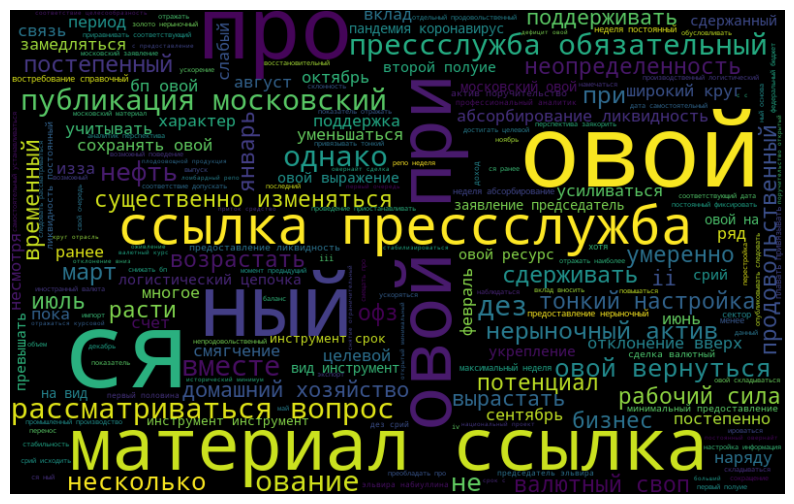

In [15]:
normal_words =' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

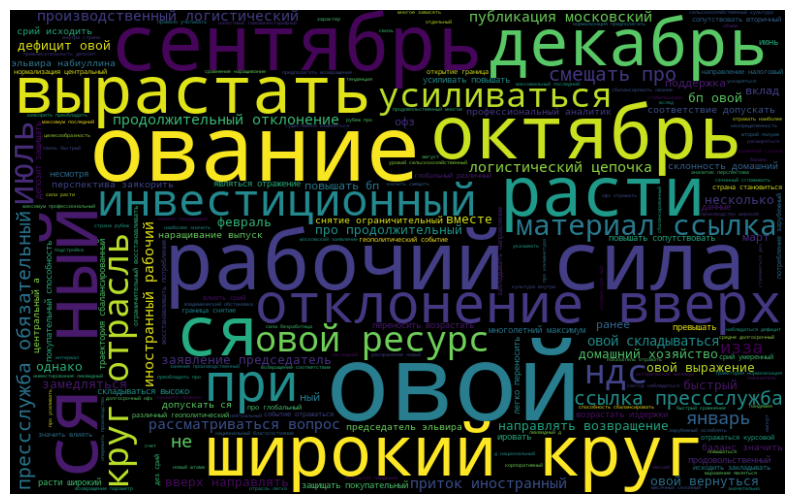

In [16]:
normal_words =' '.join([text for text in df[df['Diff'] == 1]['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

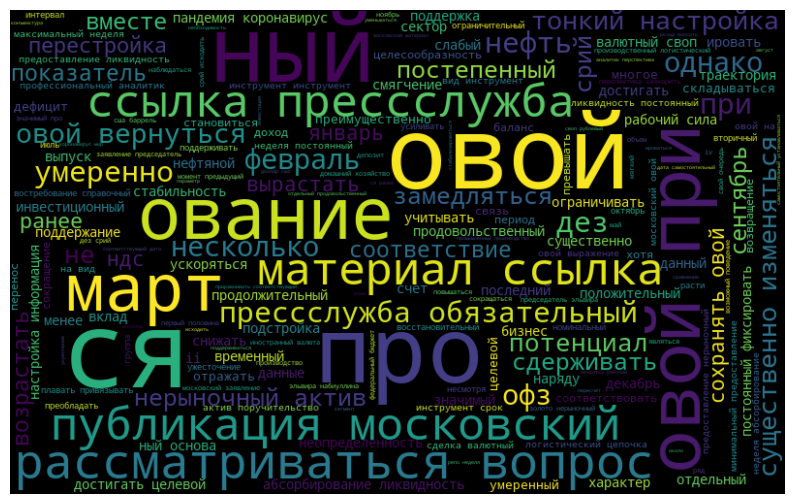

In [17]:
normal_words =' '.join([text for text in df[df['Diff'] == 0]['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

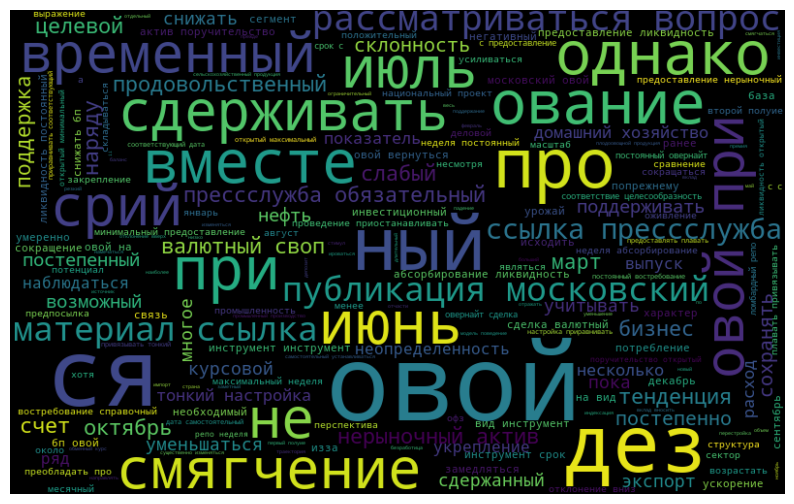

In [18]:
normal_words =' '.join([text for text in df[df['Diff'] == -1]['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Tf-idf Vectorizer

In [19]:
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import requests
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [20]:
df = pd.read_csv('CB data clean lemmatized.csv', index_col=0)
df.shape

(72, 5)

In [21]:
# df_valid = df[:12]

# df = df[12:]
# df.head(2)

In [22]:
df.head(2)

,Date,Link,Rate,Diff,text
0,27/10/23,https://www.cbr.ru/press/pr/?file=27102023_133...,13.0,1.0,совет директор банк россия октябрь год принима...
1,15/09/23,https://www.cbr.ru/press/pr/?file=15092023_133...,12.0,0.0,совет директор банк россия сентябрь год приним...


In [23]:
qs = ['ii', 'iii', 'iiiiv', 'iv']

for i in qs:
  df.text = df.text.str.replace(i, '')
df

,Date,Link,Rate,Diff,text
0,27/10/23,https://www.cbr.ru/press/pr/?file=27102023_133...,13.0,1.0,совет директор банк россия октябрь год принима...
1,15/09/23,https://www.cbr.ru/press/pr/?file=15092023_133...,12.0,0.0,совет директор банк россия сентябрь год приним...
2,15/08/23,https://www.cbr.ru/press/pr/?file=15082023_103...,12.0,1.0,совет директор банк россия принимать решение п...
3,21/07/23,https://www.cbr.ru/press/pr/?file=21072023_133...,7.5,0.0,совет директор банк россия июль год принимать ...
4,09/06/23,https://www.cbr.ru/press/pr/?file=09062023_133...,7.5,0.0,совет директор банк россия июнь год принимать ...
...,...,...,...,...,...
67,11/12/15,https://www.cbr.ru/press/pr/?file=11122015_133...,11.0,0.0,совет директор банк россия декабрь год принима...
68,30/10/15,https://www.cbr.ru/press/pr/?file=30102015_133...,11.0,0.0,совет директор банк россия октябрь год принима...
69,11/09/15,https://www.cbr.ru/press/pr/?file=11092015_133...,11.0,-1.0,совет директор банк россия сентябрь год приним...
70,31/07/15,https://www.cbr.ru/press/pr/?file=31072015_133...,11.5,-1.0,совет директор банк россия июль год принимать ...


In [24]:
# df = pd.read_csv('/content/CB data clean.csv', index_col=0)
# df = df.dropna()
# df.head()

Пока код ниже не нужен, потом его запустим

In [25]:
# from collections import Counter
# int(len(Counter(" ".join(df["text"]).split()))*0.1)

# for i in range(0,300):
#   # print(Counter(" ".join(df["text"]).split()).most_common(720)[i][0])
#   # print(i)
#   df['text'] = df['text'].str.replace(Counter(" ".join(df["text"]).split()).most_common(500)[i][0], '')

# # # print(Counter(" ".join(df["text"]).split()).most_common(720)[0][0])
# # df['text'].str.replace(Counter(" ".join(df["text"]).split()).most_common(720)[720][0], '')


# df.head()



Посмотрим на распределение наших таргетов:

In [26]:
df.groupby(['Diff'])['text'].count().to_frame()

,text
Diff,
-1.0,25
0.0,35
1.0,12


<Axes: xlabel='Diff'>

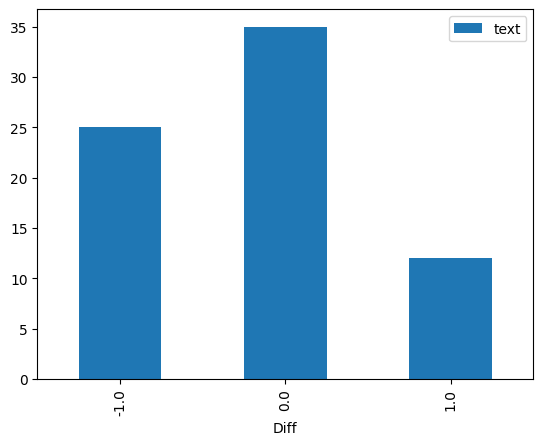

In [27]:
df.groupby(['Diff'])['text'].count().to_frame().plot.bar()

Как видно чаще всего после пресс-релизов ЦБ ставку не меняет (поэтому у нас больше всего в распределении нулевых таргетов)

Меньше всего у нас случаев, когда ЦБ ставку повышает. В целом это совйтсвенно Российскому рынку: ЦБ единожды резко повышает ставку и потом ее планомерно снижает.

Примерно треть таргетов равна -1 (35%)

Дальше делим наш датасет на треин и тест:

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df["text"],df["Diff"], test_size = 0.15, random_state = 42)
print (x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(61,) (11,) (61,) (11,)


Векторизуем наши тексты двумя способами:

count_vectorizer (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

tfidf_vectorizer (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)


In [29]:

count_vect = CountVectorizer(ngram_range=(1, 2))
vectorizer = TfidfVectorizer()


x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = vectorizer.fit_transform(x_train)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = vectorizer.transform(x_test)

print (x_train_counts.shape,x_test_counts.shape, y_train.shape, y_test.shape)
print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)


(61, 11810) (11, 11810) (61,) (11,)
(61, 1342) (11, 1342) (61,) (11,)


##  KNN COUNT

Сначала попробуем KNN с count_vectorizer и найдем с помощью GridSearch оптимальное количество соседей, k

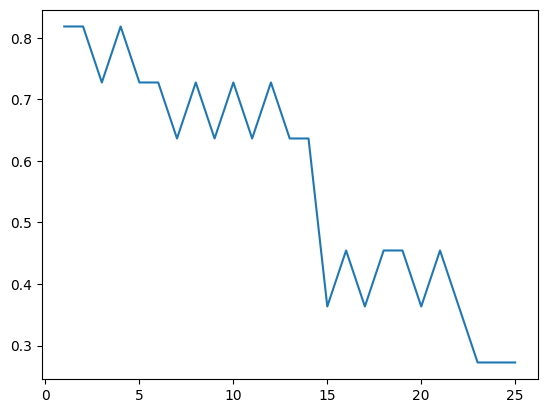

In [30]:
from sklearn import metrics



k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_counts, y_train)
    y_pred = knn.predict(x_test_counts)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

Самый высокий скор получаем с количеством соседей равным 2

Accuracy: 0.8181818181818182
              precision    recall  f1-score   support

        -1.0       1.00      0.83      0.91         6
         0.0       0.60      1.00      0.75         3
         1.0       1.00      0.50      0.67         2

    accuracy                           0.82        11
   macro avg       0.87      0.78      0.78        11
weighted avg       0.89      0.82      0.82        11


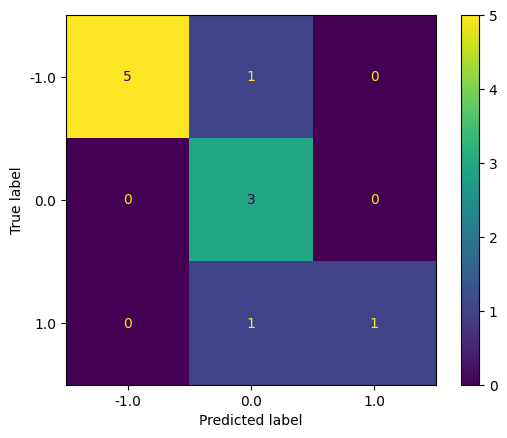

In [31]:
neigh_count = KNeighborsClassifier(n_neighbors=2)

neigh_count.fit(x_train_counts, y_train)
y_pred1 = neigh_count.predict(x_test_counts)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))
cm = confusion_matrix(y_test, y_pred1, labels=neigh_count.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=neigh_count.classes_)
disp.plot()
plt.show()

In [32]:
y_pred1

array([ 0.,  0.,  1.,  0.,  0., -1., -1., -1., -1., -1.,  0.])

##  KNN TF-IDF

При векторизации способом TF-IDF максимальный скор мы получаем с 3 соседями, k=3

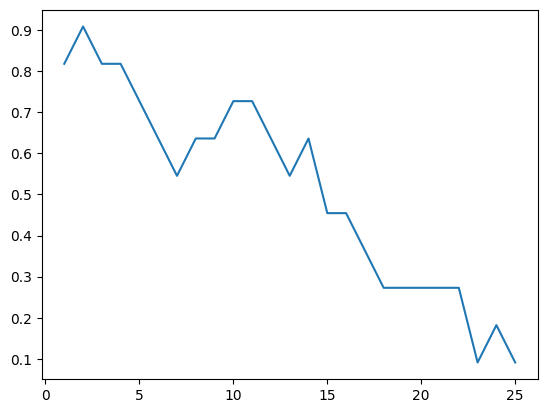

In [33]:
from sklearn import metrics


k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_tfidf, y_train)
    y_pred = knn.predict(x_test_tfidf)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         6
         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.50      0.67         2

    accuracy                           0.91        11
   macro avg       0.92      0.83      0.84        11
weighted avg       0.93      0.91      0.90        11


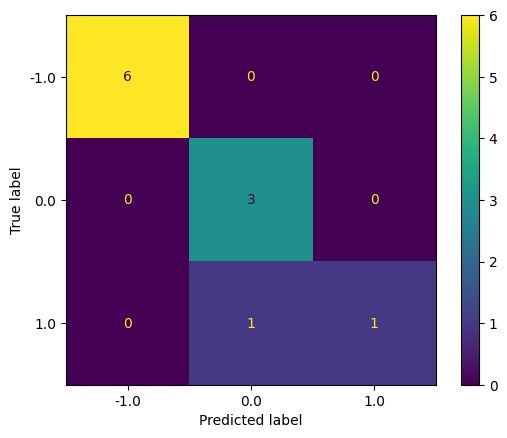

In [34]:
neigh_tfidf = KNeighborsClassifier(n_neighbors=2)
neigh_tfidf.fit(x_train_tfidf, y_train)
y_pred1 = neigh_tfidf.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))
cm = confusion_matrix(y_test, y_pred1, labels=neigh_tfidf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=neigh_tfidf.classes_)
disp.plot()
plt.show()

Выводы:

Как видно из двух таблиц наивысший скор получила модель с Count Vectorizer KNN (k=2)

Хуже всего две модели оценивают пресс-релизы с ЦБ с таргетом равным 1. Так происходит, потому что с этим скором меньше всего данных. Попробуем решить эту проблему разбив тексты на подтексты



In [35]:
test_dec_count = count_vect.transform(pd.Series(text_cleaning_from_url('https://www.cbr.ru/press/keypr/')))
# test_dec_count.data
test_dec_tfidf = vectorizer.transform(pd.Series(text_cleaning_from_url('https://www.cbr.ru/press/keypr/')))

In [36]:
print('KNN count vect prediction is ' + str(neigh_count.predict(test_dec_count)[0]))

print('KNN tf-idf vect prediction is ' + str(neigh_tfidf.predict(test_dec_tfidf)[0]))

KNN count vect prediction is 0.0
KNN tf-idf vect prediction is 0.0


In [37]:
df.head(7)

,Date,Link,Rate,Diff,text
0,27/10/23,https://www.cbr.ru/press/pr/?file=27102023_133...,13.0,1.0,совет директор банк россия октябрь год принима...
1,15/09/23,https://www.cbr.ru/press/pr/?file=15092023_133...,12.0,0.0,совет директор банк россия сентябрь год приним...
2,15/08/23,https://www.cbr.ru/press/pr/?file=15082023_103...,12.0,1.0,совет директор банк россия принимать решение п...
3,21/07/23,https://www.cbr.ru/press/pr/?file=21072023_133...,7.5,0.0,совет директор банк россия июль год принимать ...
4,09/06/23,https://www.cbr.ru/press/pr/?file=09062023_133...,7.5,0.0,совет директор банк россия июнь год принимать ...
5,28/04/23,https://www.cbr.ru/press/pr/?file=28042023_133...,7.5,0.0,совет директор банк россия апрель год принимат...
6,17/03/23,https://www.cbr.ru/press/pr/?file=17032023_133...,7.5,0.0,совет директор банк россия март год принимать ...


In [38]:
test_dec_count = count_vect.transform(pd.Series(df.text[2]))

test_dec_tfidf =  vectorizer.transform(pd.Series(df.text[2]))

In [39]:
for i in range(0,20):
  test_dec_count = count_vect.transform(pd.Series(df.text[i]))
  test_dec_tfidf =  vectorizer.transform(pd.Series(df.text[i]))
  print('KNN count vect prediction is ' + str(neigh_count.predict(test_dec_count)[0]) + '. True value is ' + str(df.Diff[i]))
  print('KNN tf-idf vect prediction is ' + str(neigh_tfidf.predict(test_dec_tfidf)[0]) + '. True value is ' + str(df.Diff[i]))
  print('\n')

KNN count vect prediction is 0.0. True value is 1.0
KNN tf-idf vect prediction is 0.0. True value is 1.0


KNN count vect prediction is 0.0. True value is 0.0
KNN tf-idf vect prediction is 0.0. True value is 0.0


KNN count vect prediction is 0.0. True value is 1.0
KNN tf-idf vect prediction is 0.0. True value is 1.0


KNN count vect prediction is 0.0. True value is 0.0
KNN tf-idf vect prediction is 0.0. True value is 0.0


KNN count vect prediction is 0.0. True value is 0.0
KNN tf-idf vect prediction is 0.0. True value is 0.0


KNN count vect prediction is 0.0. True value is 0.0
KNN tf-idf vect prediction is 0.0. True value is 0.0


KNN count vect prediction is 0.0. True value is 0.0
KNN tf-idf vect prediction is 0.0. True value is 0.0


KNN count vect prediction is 0.0. True value is 0.0
KNN tf-idf vect prediction is 0.0. True value is 0.0


KNN count vect prediction is 0.0. True value is 0.0
KNN tf-idf vect prediction is 0.0. True value is 0.0


KNN count vect prediction is -1.0. Tr

In [40]:
len(text_cleaning_from_url('https://www.cbr.ru/press/keypr/'))

3948

In [41]:
text_cleaning_from_url('https://www.cbr.ru/press/keypr/')

'совет директор банк россия март год принимать решение сохранять ключевой ставка уровень годовой текущий инфляционный давление постепенно ослабевать оставаться высокий внутренний спрос продолжать значительно опережать возможность расширение производство товар услуга жесткость рынок труд вновь усиливаться пока преждевременно судить дальнейший скорость дезинфляционный тенденция проводить банк россия денежнокредитный политика закреплять процесс дезинфляция экономика возвращение инфляция цель год дальнейший стабилизация вблизи предполагать продолжительный период поддержание жесткий денежнокредитный условие экономика согласно прогноз банк россия c учет проводить денежнокредитный политика годовой инфляция снижаться год находиться вблизи дальнейший текущий рост цена поправка сезонность февраль оставаться уровень январь март предварительный данные снижаться тенденция разрез потребительский корзина различаться значимый замедление рост цена товар сопровождаться ускорение услуга показатель годово

In [42]:
ex_down = pd.Series(df.text[9])

print(neigh_count.predict(count_vect.transform(ex_down)[0]))
print(neigh_tfidf.predict(vectorizer.transform(ex_down)[0]))

[-1.]
[-1.]


## Word-2-Vec >> Работает плохо, но в ресерче нужно об этом написать!!!

In [43]:
import gensim

In [44]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

In [45]:
review_text = df.text.str.split()

In [46]:
model.build_vocab(review_text, progress_per=1000)

In [47]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(182822, 245745)

In [48]:
model.wv['снижать']

array([-0.15154986,  0.28646472, -0.17975195,  0.17022787,  0.35922146,
       -0.47529095,  0.16346797,  0.5967486 , -0.35407257, -0.063082  ,
        0.13999166, -0.10837423,  0.25001532,  0.19567142,  0.11421521,
       -0.09408692,  0.2689089 , -0.0726358 , -0.24476433, -0.7474562 ,
       -0.15093745,  0.04710943,  0.11247536, -0.31662694, -0.36618936,
       -0.02910537, -0.292285  ,  0.09798523, -0.3113957 ,  0.13215083,
        0.3478764 , -0.18420775, -0.19715615, -0.17345919, -0.12060912,
        0.16950336,  0.04689923, -0.06455051,  0.00359187, -0.2594307 ,
        0.1398377 , -0.22860697, -0.24588038, -0.13242328,  0.20958835,
       -0.15561748, -0.03496142, -0.17295025,  0.3744203 , -0.05957566,
       -0.0800492 , -0.11496092,  0.37566614, -0.08380526, -0.07360794,
        0.11347944,  0.0470465 ,  0.1015445 , -0.29969144,  0.06479871,
        0.1244901 ,  0.10399277, -0.03061459,  0.02173484,  0.02004813,
        0.37826434,  0.20271604,  0.21965364, -0.26419842, -0.25

In [49]:
model.wv.most_similar("снижать")

[('итог', 0.9942437410354614),
 ('банк', 0.9814293384552002),
 ('россия', 0.9808559417724609),
 ('предыдущий', 0.9788815975189209),
 ('момент', 0.9762431979179382),
 ('прогноз', 0.9732488989830017),
 ('решение', 0.9729162454605103),
 ('пространство', 0.9727292656898499),
 ('видеть', 0.9713694453239441),
 ('нейтральный', 0.967997670173645)]

In [50]:
model.wv.similarity(w1="снижать", w2="смягчаться")

0.9423603

In [51]:
df.head(2)

,Date,Link,Rate,Diff,text
0,27/10/23,https://www.cbr.ru/press/pr/?file=27102023_133...,13.0,1.0,совет директор банк россия октябрь год принима...
1,15/09/23,https://www.cbr.ru/press/pr/?file=15092023_133...,12.0,0.0,совет директор банк россия сентябрь год приним...


In [52]:


corpus = df['text'].values

# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)

#print(vectorizer.get_feature_names())

# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
CountVectorizedData['Diff']=df['Diff']
print(CountVectorizedData.shape)
# CountVectorizedData = CountVectorizedData[CountVectorizedData.columns[1:]]
CountVectorizedData


(72, 1390)


,_____________________,libor,urals,абсорбирование,август,августеоктябрь,августесентябрь,агент,аграрный,адаптация,...,этап,это,эффект,эффективность,юридический,являться,январеапрель,январефевраль,январь,Diff
0,0,0,0,0,0,0,0,0,0,0,...,0,5,3,0,0,2,0,0,0,1.0
1,0,0,0,0,2,0,0,0,0,1,...,0,7,1,0,0,3,0,0,0,0.0
2,0,0,0,0,2,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,1,...,2,6,1,0,0,5,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,1,...,1,9,1,0,0,2,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,0,0,2,0,1,0,0,1,1,...,0,1,1,0,0,1,0,0,2,0.0
68,0,0,0,2,1,0,0,0,0,1,...,0,3,0,0,0,1,0,0,0,0.0
69,0,0,0,2,2,0,0,1,0,0,...,0,3,0,0,0,1,0,0,0,-1.0
70,0,0,0,2,0,0,0,1,0,0,...,0,4,0,0,0,1,0,0,0,-1.0


In [53]:

# Creating the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.columns[:-1]

In [54]:

# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()

    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):

        # initiating a sentence with all zeros
        Sentence = np.zeros(100)

        # Looping thru each word in the sentence and if its present in
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVecData.iloc[i , :]>=1]:
            #print(word)
            if word in model.wv.key_to_index.keys():
                Sentence=Sentence+model.wv[word]
        # Appending the sentence to the dataframe
        W2Vec_Data=pd.concat([W2Vec_Data, pd.DataFrame([Sentence])])
    return(W2Vec_Data)

In [55]:
# Since there are so many words... This will take some time :(
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data=FunctionText2Vec(df['text'])

# Checking the new representation for sentences
W2Vec_Data.shape

(72, 100)

In [56]:
# Comparing the above with the document term matrix
CountVectorizedData.shape

(72, 1390)

In [57]:
# Adding the target variable
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['Diff']=CountVectorizedData['Diff']

# Assigning to DataForML variable
DataForML=W2Vec_Data
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Diff
0,5.268181,87.024426,-9.670333,-16.253680,44.603876,-179.566686,81.224278,224.473557,-88.017373,-35.263987,...,101.413566,29.842901,116.896438,200.671471,143.051152,41.928870,-37.045874,-16.733713,20.965953,1.0
1,6.147932,83.060484,-9.263832,-16.811066,43.203585,-171.518063,77.621704,214.002321,-83.967872,-33.352674,...,97.814729,28.245825,112.338113,191.916543,136.826796,40.662319,-34.900174,-15.807876,21.160882,0.0
2,-4.707319,46.819260,-18.292982,-1.330263,40.893636,-85.560946,36.580364,104.380733,-47.731048,-14.627747,...,39.300463,20.961749,59.033434,90.543656,53.785407,18.743083,-7.182977,-4.371647,24.546498,1.0
3,6.125718,80.968824,-11.484810,-16.975006,45.271019,-165.284023,73.617744,205.195845,-81.922523,-31.728991,...,93.360428,26.508378,109.835692,184.616559,129.610568,38.573660,-31.809678,-14.732369,25.220906,0.0
4,7.250501,85.302137,-9.375270,-18.104051,43.504381,-177.601782,79.329305,222.375879,-87.811568,-33.985686,...,102.165786,27.159684,117.209759,199.114227,142.315814,41.503861,-36.714679,-16.409536,22.351567,0.0


In [58]:
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50, 100)
(50,)
(22, 100)
(22,)


In [59]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization is used because we need to fit Naive Bayes

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50, 100)
(50,)
(22, 100)
(22,)


In [60]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=15)
              precision    recall  f1-score   support

        -1.0       0.25      1.00      0.40         4
         0.0       0.33      0.15      0.21        13
         1.0       0.00      0.00      0.00         5

    accuracy                           0.27        22
   macro avg       0.19      0.38      0.20        22
weighted avg       0.24      0.27      0.20        22

[[ 4  0  0]
 [11  2  0]
 [ 1  4  0]]
Accuracy of the model on Testing Sample Data: 0.2


C:\Users\slava\PycharmProjects\Camp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\slava\PycharmProjects\Camp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\slava\PycharmProjects\Camp\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

DecisionTreeClassifier(max_depth=20)
              precision    recall  f1-score   support

        -1.0       0.17      0.25      0.20         4
         0.0       0.54      0.54      0.54        13
         1.0       0.67      0.40      0.50         5

    accuracy                           0.45        22
   macro avg       0.46      0.40      0.41        22
weighted avg       0.50      0.45      0.47        22

[[1 3 0]
 [5 7 1]
 [0 3 2]]
Accuracy of the model on Testing Sample Data: 0.47


<Axes: >

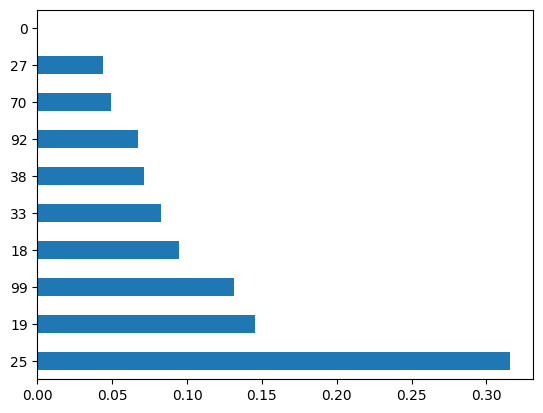

In [61]:
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [63]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=20, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
#%matplotlib inline
#feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

## LDA

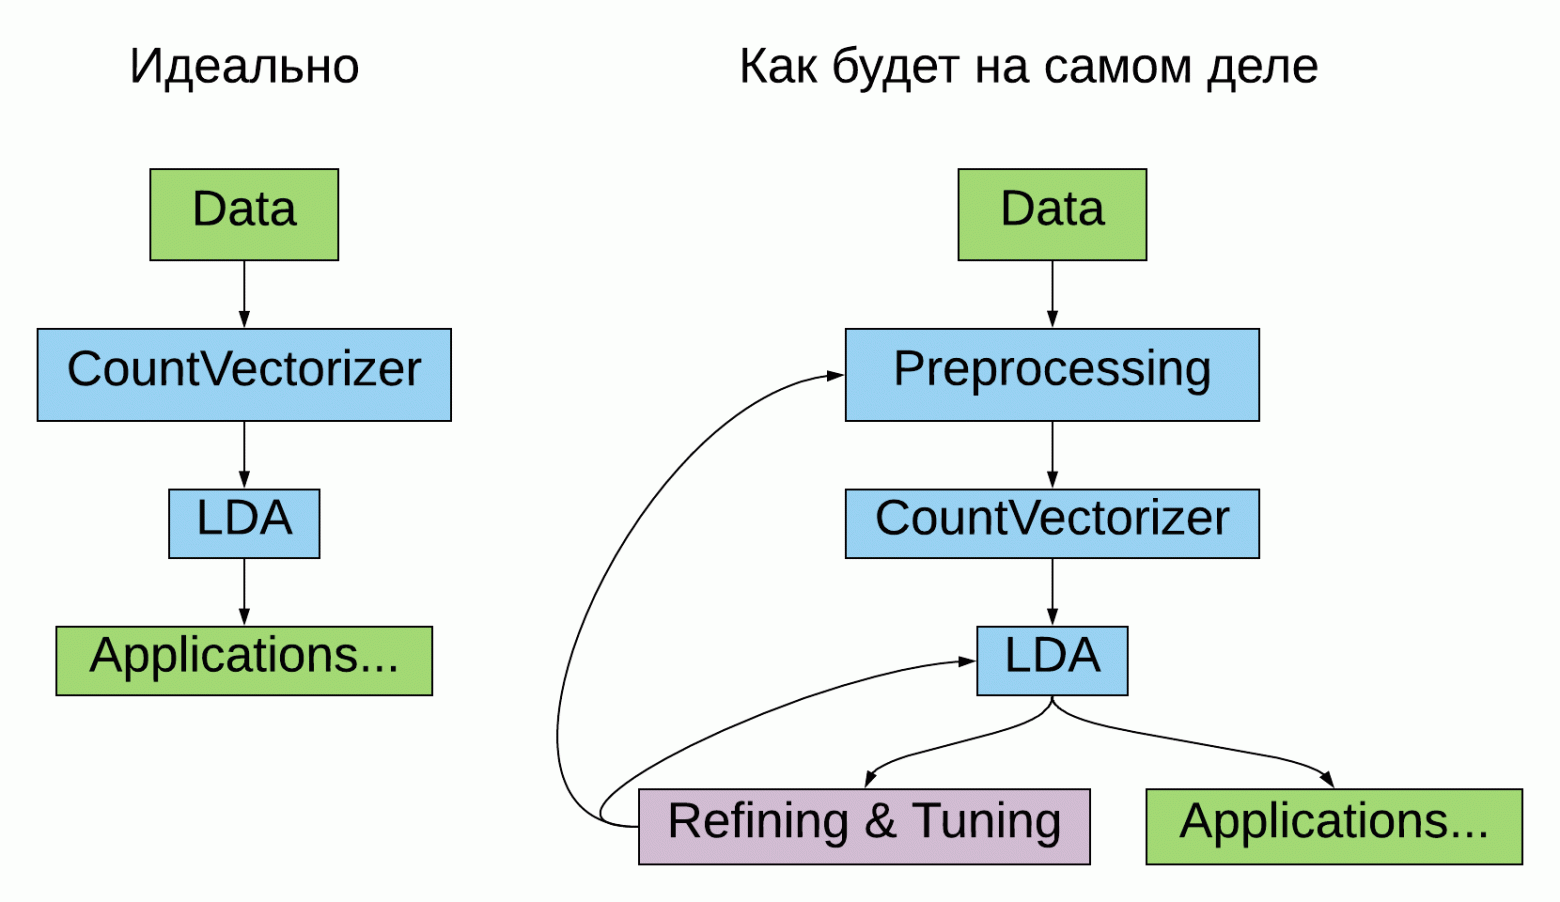

In [64]:
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [66]:
documents_list = df['text'].tolist()

In [68]:
df.head(2)

,Date,Link,Rate,Diff,text
0,27/10/23,https://www.cbr.ru/press/pr/?file=27102023_133...,13.0,1.0,совет директор банк россия октябрь год принима...
1,15/09/23,https://www.cbr.ru/press/pr/?file=15092023_133...,12.0,0.0,совет директор банк россия сентябрь год приним...


In [69]:
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(
                        # lowercase=True,
                        # stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize
                        )

# Fit and Transform the documents
train_data = tfidf.fit_transform(documents_list)
print(train_data.shape)

(72, 1394)


C:\Users\slava\PycharmProjects\Camp\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [70]:
sl = tfidf.get_feature_names_out()[0]


In [71]:
num_components=3

# Create LDA object
model=LatentDirichletAllocation(n_components=num_components)

# Fit and Transform SVD model on data
lda_matrix = model.fit_transform(train_data)

# Get Components
lda_components=model.components_

In [72]:
# Print the topics with their terms
terms = tfidf.get_feature_names_out()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['банк', 'россия', 'год', 'ставка', 'инфляция', 'рост', 'риск', 'ключевой', 'условие', 'динамика']
Topic 1:  ['обесценение', 'состояться', 'девальвационный', 'кардинальный', 'ценовой', 'компенсировать', 'движение', 'гражданин', 'сегодняшний', 'благодаря']
Topic 2:  ['обесценение', 'состояться', 'девальвационный', 'кардинальный', 'ценовой', 'компенсировать', 'движение', 'гражданин', 'сегодняшний', 'благодаря']


In [75]:
from collections import Counter
common_words = []

for i in Counter(" ".join(df["text"]).split()).most_common(150):
  common_words.append(i[0])


for i in common_words:
  df['text'] = df['text'].str.replace(i,'')


In [76]:
!pip install pyldavis
# imports
!pip install gensim pyLDAvis
! python3 -m spacy download en_core_web_sm

import pandas as pd
import numpy as np

import string
import spacy
# import nltk

import gensim
from gensim import corpora

import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim_models

nltk.download('wordnet')
from nltk.corpus import wordnet as wn
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy.cli
spacy.cli.download("en_core_web_md")
import en_core_web_md

Python 
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\slava\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\slava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## LDA classification

In [78]:
df

,Date,Link,Rate,Diff,text
0,27/10/23,https://www.cbr.ru/press/pr/?file=27102023_133...,13.0,1.0,бп значительно усиливать склады...
1,15/09/23,https://www.cbr.ru/press/pr/?file=15092023_133...,12.0,0.0,бп реализовать опережа...
2,15/08/23,https://www.cbr.ru/press/pr/?file=15082023_103...,12.0,1.0,август бп дан стабильность ...
3,21/07/23,https://www.cbr.ru/press/pr/?file=21072023_133...,7.5,0.0,бп включая широкий набор пре...
4,09/06/23,https://www.cbr.ru/press/pr/?file=09062023_133...,7.5,0.0,быстро предп...
...,...,...,...,...,...
67,11/12/15,https://www.cbr.ru/press/pr/?file=11122015_133...,11.0,0.0,охлаждение около ...
68,30/10/15,https://www.cbr.ru/press/pr/?file=30102015_133...,11.0,0.0,оставлять охлаждение ...
69,11/09/15,https://www.cbr.ru/press/pr/?file=11092015_133...,11.0,-1.0,охлаждение август ухудш...
70,31/07/15,https://www.cbr.ru/press/pr/?file=31072015_133...,11.5,-1.0,попрежму смещать охлаждение ...


In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Подготовка данных
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Diff'], test_size=0.3, random_state=428, stratify=df['Diff'])

# Тематическая классификация (Multinomial Naive Bayes)
model = make_pipeline(CountVectorizer(stop_words=stopwords.words("russian")), KNeighborsClassifier(n_neighbors=2))
model.fit(X_train, y_train)


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['и', 'в', 'во', 'не', 'что', 'он',
                                             'на', 'я', 'с', 'со', 'как', 'а',
                                             'то', 'все', 'она', 'так', 'его',
                                             'но', 'да', 'ты', 'к', 'у', 'же',
                                             'вы', 'за', 'бы', 'по', 'только',
                                             'ее', 'мне', ...])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [141]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.62      0.71      0.67         7
         0.0       0.67      0.73      0.70        11
         1.0       1.00      0.50      0.67         4

    accuracy                           0.68        22
   macro avg       0.76      0.65      0.68        22
weighted avg       0.71      0.68      0.68        22


## Torch

In [ ]:

from torch.testing._internal.distributed.distributed_test import Net
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(14, 270)
        self.fc2 = nn.Linear(270, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = F.dropout(x, p=0.1)
        x = F.relu(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)

        return x

model = Model()